In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Імплементація перетворення

Нехай $I(x,y)$ — інтенсивність пікселя з координатами $(x,y)$. Тоді гістограмне зменшення контрасту зображення обчислюється так

$
I'_{(x,y)}(r,g,b) =
a \cdot
\left(
    I_{(x,y)}(r,g,b) - s
\right) + t
$ [1], де
- $I'(x,y)$ — інтенсивність пікселя після перетворення
- $0 < a < 1$ — різниця між кутовими коефіцієнтами до та після перетворення,
- $s \in [1, 255] \subset \mathbb{Z}$ — зменшення яскравості
- $t \in \{1,2,3\}$ — зміщення центру перегину кривої

Функція `lower_matrix_contrast` застосовує перетворення [1] до матриці на вході.

In [2]:
def lower_matrix_contrast(source, ang_coeff=0.5, low_bright=0, shift_center=0):
    new_matrix = ang_coeff * (source - low_bright) + shift_center
    np.clip(new_matrix, a_min=0, a_max=255, out=new_matrix)
    np.around(new_matrix, out=new_matrix)
    return new_matrix.astype(int)

Функція `lower_contrast` застосовує перетворення `lower_matrix_contrast` до всіх каналів масиву на вході.

In [3]:
def lower_contrast(source: np.ndarray, *args, **kwargs):
    new_img = np.empty_like(source)
    for dim in [0, 1, 2]:
        new_img[:, :, dim] = lower_matrix_contrast(
            (source[:, :, dim]).astype(int), *args, **kwargs
        )
    return new_img

# Зчитування зображення

In [4]:
# cvtColor переставляє канали місцями, оскільки OpenCV зчитує зображення в BGR
cat_low_img = cv2.cvtColor(cv2.imread('cat_low.jpeg'), cv2.COLOR_BGR2RGB)
sun_high_img = cv2.cvtColor(cv2.imread('sun.jpeg'), cv2.COLOR_BGR2RGB)

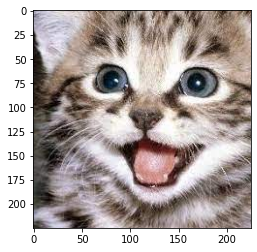

In [5]:
plt.imshow(cat_low_img)

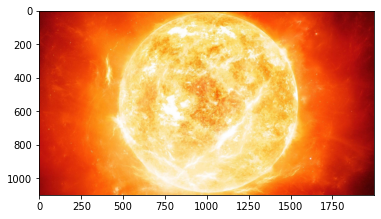

In [6]:
plt.imshow(sun_high_img)

# Перетворення зображення

## Зміна кутового коефіцієнта

CPU times: user 254 ms, sys: 16.2 ms, total: 270 ms
Wall time: 443 ms


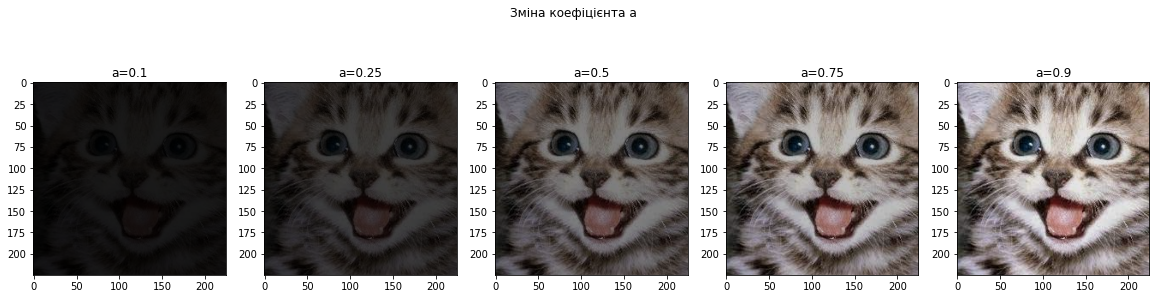

In [7]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Зміна коефіцієнта a')

a_coeff_cat_imgs = []

ang_coeffs = [0.1, 0.25, 0.5, 0.75, 0.9]
for ang_coeff, axis in zip(ang_coeffs, axes):
    a_coeff_cat_imgs.append(lower_contrast(
        cat_low_img,
        ang_coeff=ang_coeff,
        low_bright=0, shift_center=0

    ))
    axis.imshow(a_coeff_cat_imgs[-1])
    axis.set_title(f"a={ang_coeff}")

CPU times: user 1.29 s, sys: 824 ms, total: 2.11 s
Wall time: 4.82 s


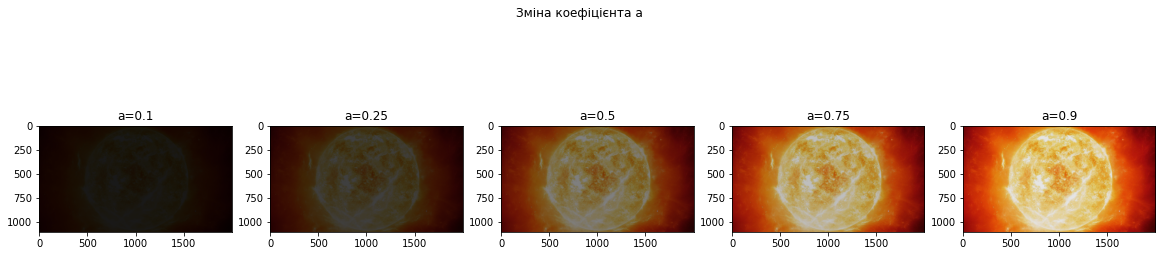

In [8]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Зміна коефіцієнта a')

a_coeff_sun_imgs = []

ang_coeffs = [0.1, 0.25, 0.5, 0.75, 0.9]
for ang_coeff, axis in zip(ang_coeffs, axes):
    a_coeff_sun_imgs.append(lower_contrast(
        sun_high_img,
        ang_coeff=ang_coeff,
        low_bright=0, shift_center=0

    ))
    axis.imshow(a_coeff_sun_imgs[-1])
    axis.set_title(f"a={ang_coeff}")

## Зменшення яскравості

CPU times: user 303 ms, sys: 8.62 ms, total: 312 ms
Wall time: 488 ms


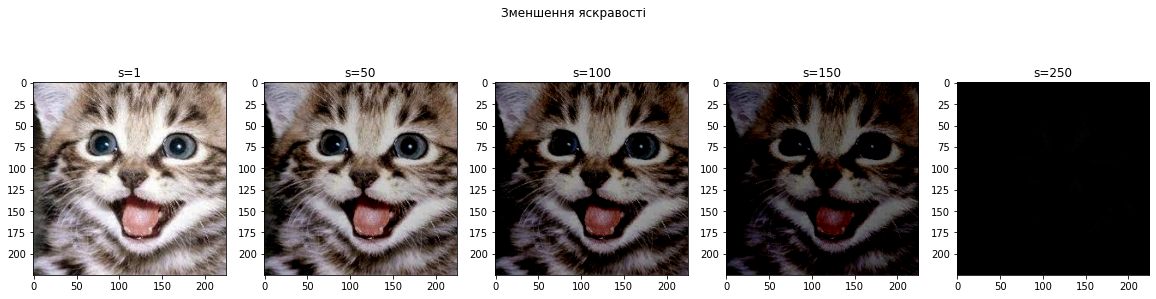

In [9]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Зменшення яскравості')

bright_cat_imgs = []

low_bright = [1, 50, 100, 150, 250]
for low_bright_coeff, axis in zip(low_bright, axes):
    bright_cat_imgs.append(lower_contrast(
        cat_low_img,
        ang_coeff=1,
        low_bright=low_bright_coeff, shift_center=0

    ))
    axis.imshow(bright_cat_imgs[-1])
    axis.set_title(f"s={low_bright_coeff}")

CPU times: user 237 ms, sys: 8.2 ms, total: 246 ms
Wall time: 338 ms


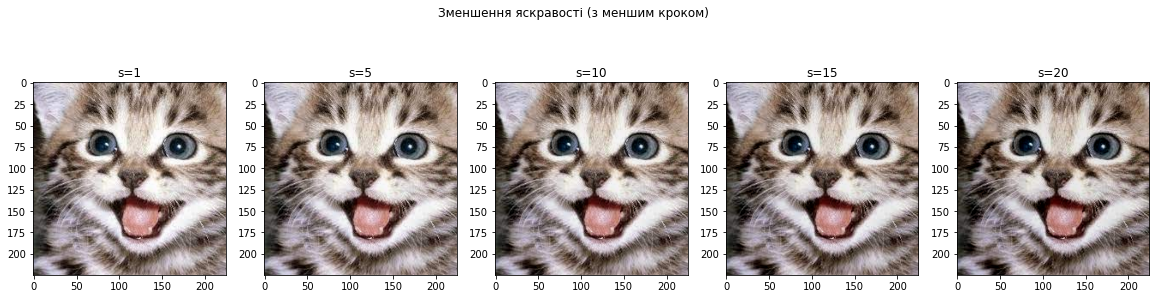

In [59]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Зменшення яскравості (з меншим кроком)')

bright_cat_imgs_1 = []

low_bright = [1, 5, 10, 15, 20]
for low_bright_coeff, axis in zip(low_bright, axes):
    bright_cat_imgs_1.append(lower_contrast(
        cat_low_img,
        ang_coeff=1,
        low_bright=low_bright_coeff, shift_center=0

    ))
    axis.imshow(bright_cat_imgs_1[-1])
    axis.set_title(f"s={low_bright_coeff}")

CPU times: user 1.22 s, sys: 597 ms, total: 1.81 s
Wall time: 2.57 s


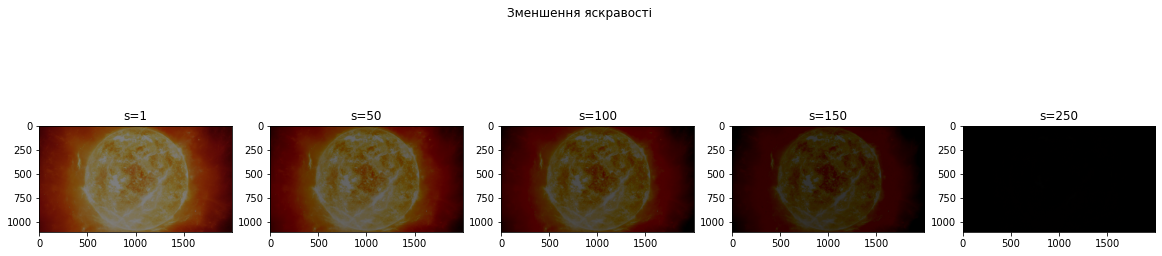

In [10]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Зменшення яскравості')

bright_sun_imgs = []

low_bright = [1, 50, 100, 150, 250]
for low_bright_coeff, axis in zip(low_bright, axes):
    bright_sun_imgs.append(lower_contrast(
        sun_high_img,
        ang_coeff=0.5,
        low_bright=low_bright_coeff, shift_center=0

    ))
    axis.imshow(bright_sun_imgs[-1])
    axis.set_title(f"s={low_bright_coeff}")

## Зміна зсуву точки згину

CPU times: user 233 ms, sys: 9.98 ms, total: 243 ms
Wall time: 323 ms


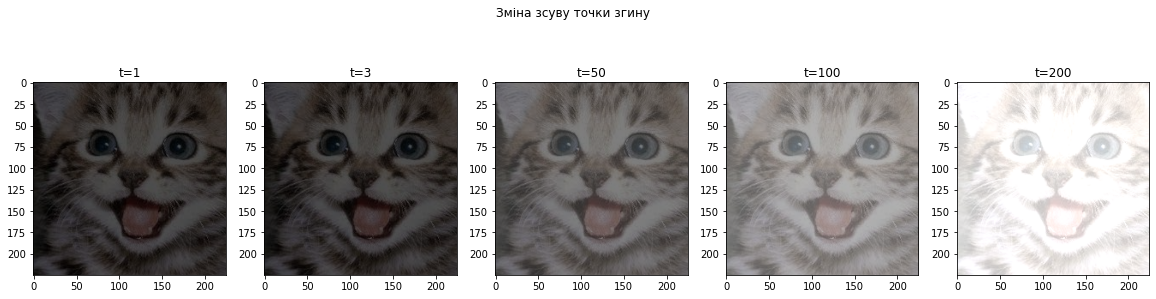

In [11]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Зміна зсуву точки згину')

shift_cat_imgs = []

shift_center = [1, 3, 50, 100, 200]
for shift_center_coeff, axis in zip(shift_center, axes):
    shift_cat_imgs.append(lower_contrast(
        cat_low_img,
        ang_coeff=0.3, low_bright=0, shift_center=shift_center_coeff

    ))
    axis.imshow(shift_cat_imgs[-1])
    axis.set_title(f"t={shift_center_coeff}")

CPU times: user 1.29 s, sys: 687 ms, total: 1.97 s
Wall time: 2.53 s


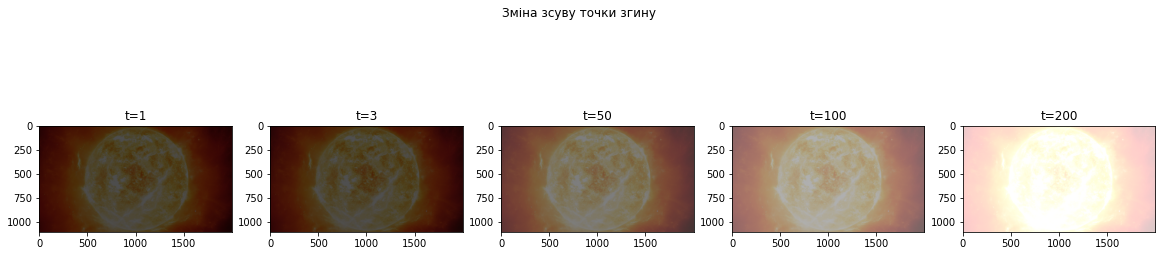

In [12]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Зміна зсуву точки згину')

shift_sun_imgs = []

shift_center = [1, 3, 50, 100, 200]
for shift_center_coeff, axis in zip(shift_center, axes):
    shift_sun_imgs.append(lower_contrast(
        sun_high_img,
        ang_coeff=0.3, low_bright=0, shift_center=shift_center_coeff

    ))
    axis.imshow(shift_sun_imgs[-1])
    axis.set_title(f"t={shift_center_coeff}")

# Дослідження гістограми

In [44]:
def draw_histo(image, axis, caption):
    for channel_id, c in zip([0, 1, 2], ["red", "green", "blue"]):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        axis.plot(bin_edges[0:-1], histogram, color=c)
    axis.set_title(caption)

In [45]:
def draw_multiple_histo(images, name, captions):
    fig, axes = plt.subplots(1, len(images), figsize=(20, len(images)), sharex=True)
    for axis, image, caption in zip(axes, images, captions):
        draw_histo(image, axis, caption)
#     fig.supxlabel('common x label')
#     fig.supylabel('common y label')
    fig.suptitle(name)

## Порівняння зміни кутового коефіцієнта

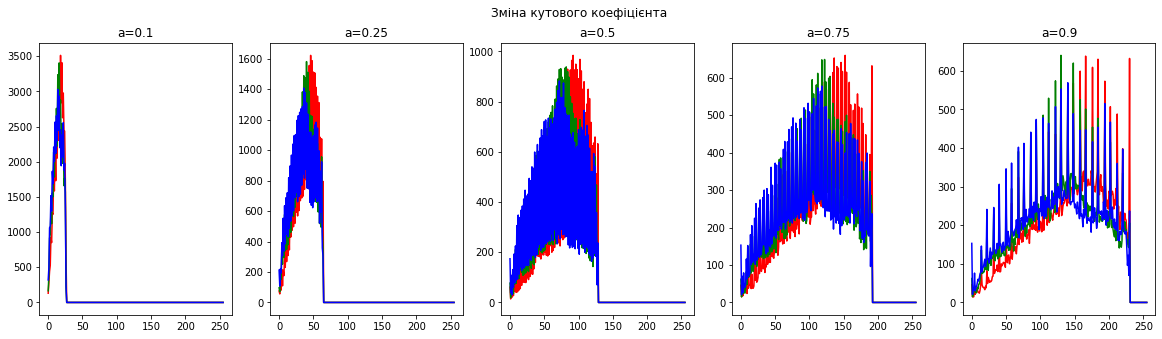

In [46]:
draw_multiple_histo(
    a_coeff_cat_imgs,
    'Зміна кутового коефіцієнта',
    ["a=0.1", "a=0.25", "a=0.5", "a=0.75", "a=0.9"])

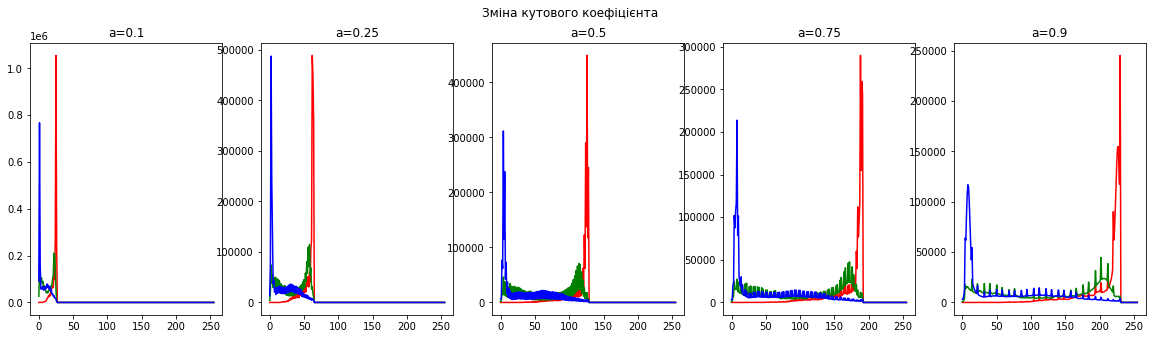

In [47]:
draw_multiple_histo(
    a_coeff_sun_imgs,
    'Зміна кутового коефіцієнта',
    ["a=0.1", "a=0.25", "a=0.5", "a=0.75", "a=0.9"])

## Порівняння зменшення яскравості

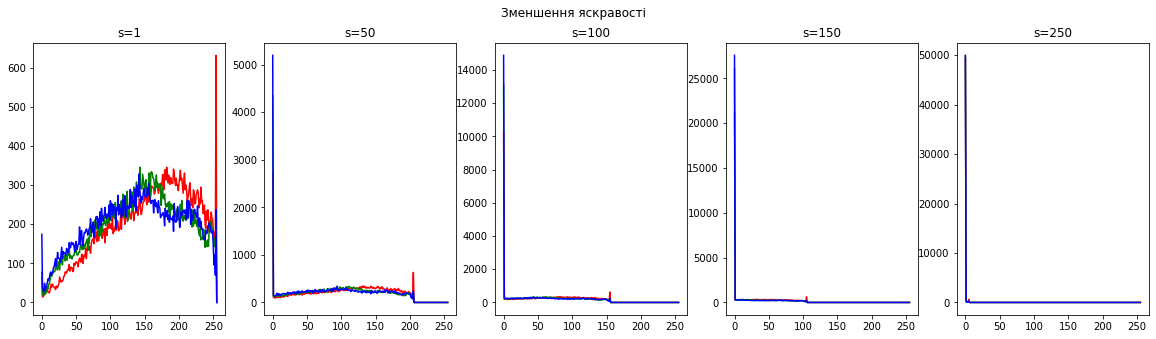

In [48]:
draw_multiple_histo(
    bright_cat_imgs,
    'Зменшення яскравості',
    ["s=1", "s=50", "s=100", "s=150", "s=250"])

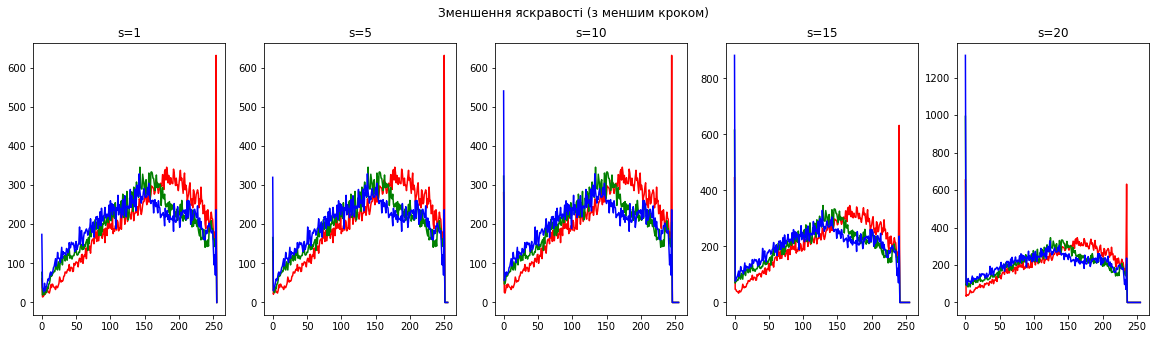

In [62]:
draw_multiple_histo(
    bright_cat_imgs_1,
    'Зменшення яскравості (з меншим кроком)',
    ["s=1", "s=5", "s=10", "s=15", "s=20"])

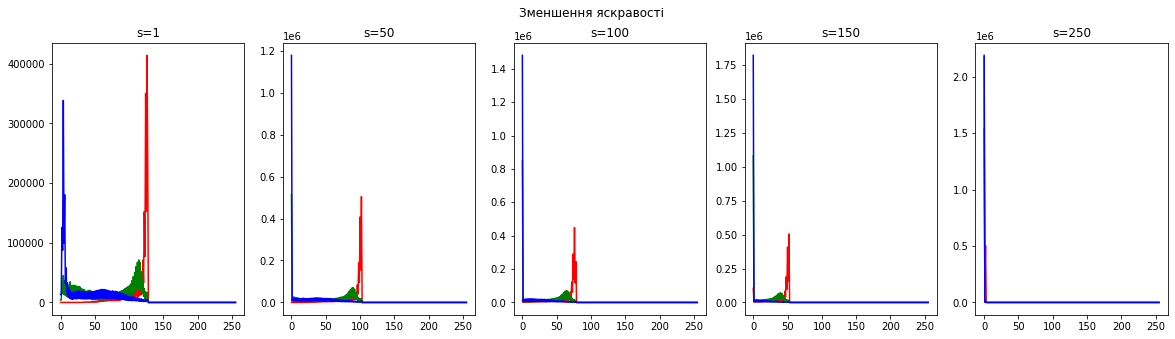

In [49]:
draw_multiple_histo(
    bright_sun_imgs,
    'Зменшення яскравості',
    ["s=1", "s=50", "s=100", "s=150", "s=250"])

## Порівняння зсуву точки згину

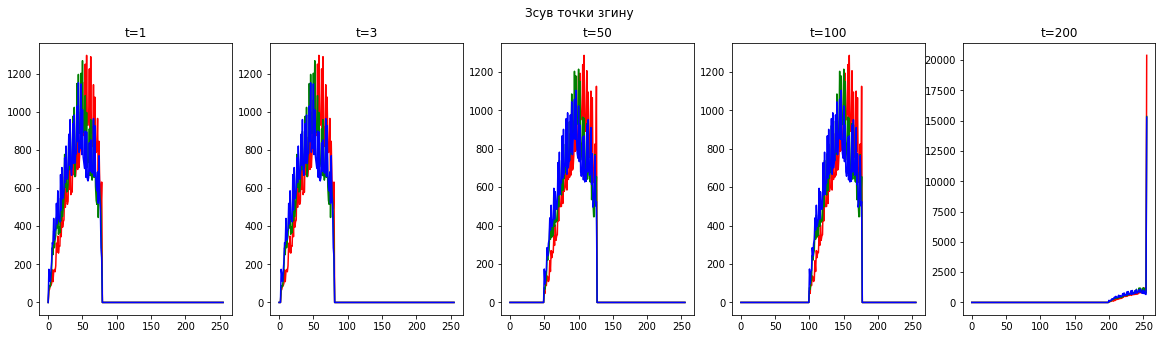

In [50]:
draw_multiple_histo(
    shift_cat_imgs,
    'Зсув точки згину',
    ["t=1", "t=3", "t=50", "t=100", "t=200"])

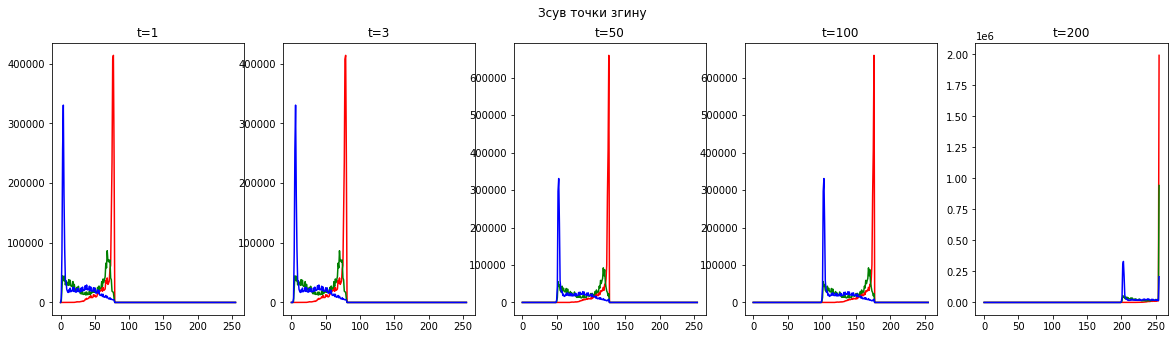

In [51]:
draw_multiple_histo(
    shift_sun_imgs,
    'Зсув точки згину',
    ["t=1", "t=3", "t=50", "t=100", "t=200"])